In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import label, binary_erosion 

In [2]:
img = cv2.imread("/mnt/e/Term 4/HW/HW8/images/q4/cells.png", cv2.IMREAD_GRAYSCALE)

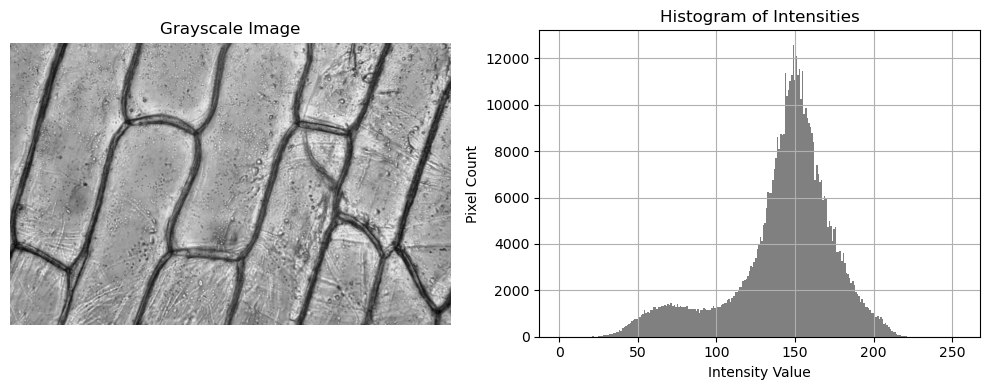

In [3]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Grayscale Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Histogram of Intensities")
plt.hist(img.ravel(), bins=256, range=(0,255), color='gray')
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')
plt.grid(True)
plt.tight_layout()
plt.show()

In [78]:
threshold_value = 90
binary_img = (img > threshold_value).astype(np.uint8)


(-0.5, 949.5, 607.5, -0.5)

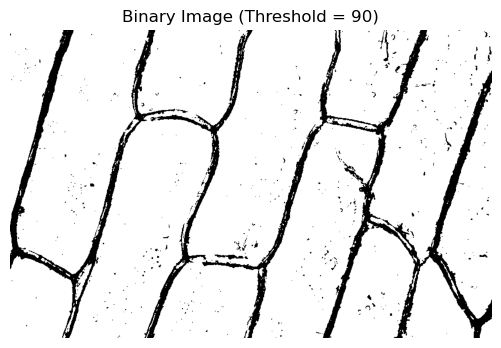

In [79]:
plt.figure(figsize=(10, 4))
plt.title(f'Binary Image (Threshold = {threshold_value})')
plt.imshow(binary_img, cmap='gray')
plt.axis('off')


In [80]:
seed_mask = 1 - binary_img

# Reduce seed regions to 1 pixel using erosion
structure = np.ones((3,3), dtype=np.uint8)  # 8-connectivity
labeled, num = label(seed_mask, structure=structure)

eroded = np.zeros_like(seed_mask, dtype=np.uint8)
for i in range(1, num+1):
    component = (labeled == i)
    # Apply erosion until one pixel remains
    while np.count_nonzero(component) > 1:
        component = binary_erosion(component, structure=structure, border_value=0)
    eroded[component] = 1

(-0.5, 949.5, 607.5, -0.5)

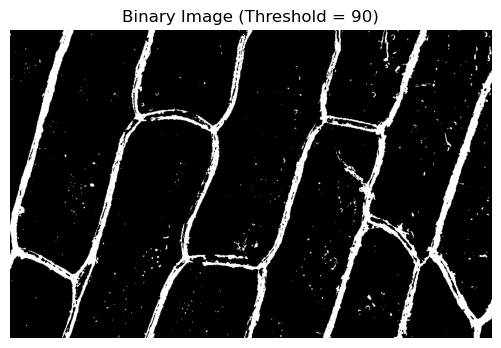

In [81]:
plt.figure(figsize=(10, 4))
plt.title(f'Binary Image (Threshold = {threshold_value})')
plt.imshow(seed_mask, cmap='gray')
plt.axis('off')


(-0.5, 949.5, 607.5, -0.5)

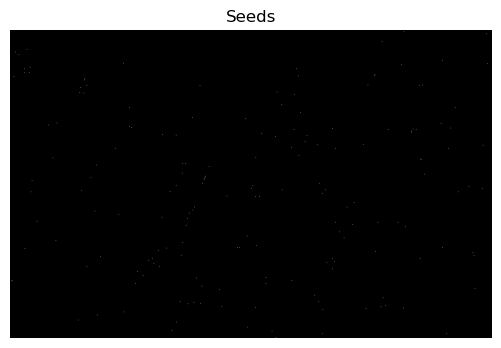

In [82]:
plt.figure(figsize=(10, 4))
plt.title(f'Seeds')
plt.imshow(eroded, cmap='gray')
plt.axis('off')

In [83]:
# Get seed coordinates
seed_coords = np.argwhere(eroded == 1)
seed_coords.shape

(176, 2)

In [100]:
# Region Growing
T = 45
visited = np.zeros_like(img, dtype=bool)
label_img = np.zeros_like(img, dtype=np.int32)
region_id = 1
H, W = img.shape
connectivity = [(-1,-1), (-1,0), (-1,1),
                ( 0,-1),        ( 0,1),
                ( 1,-1), ( 1,0), ( 1,1)]

for seed in seed_coords:
    x, y = seed
    if visited[x, y]: continue
    seed_val = img[x, y]
    queue = [(x, y)]
    while queue:
        cx, cy = queue.pop(0)
        if visited[cx, cy]: continue
        if abs(int(img[cx, cy]) - int(seed_val)) > T: continue
        visited[cx, cy] = True
        label_img[cx, cy] = region_id
        for dx, dy in connectivity:
            nx, ny = cx + dx, cy + dy
            if 0 <= nx < H and 0 <= ny < W and not visited[nx, ny]:
                queue.append((nx, ny))
    region_id += 1

In [101]:
# Color overlay on original image
color_output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
colors = [(255,0,0), (0,255,0), (0,0,255), (255,255,0), (0,255,255), (255,0,255)]
for i in range(1, region_id):
    mask = (label_img == i)
    color_output[mask] = colors[i % len(colors)]


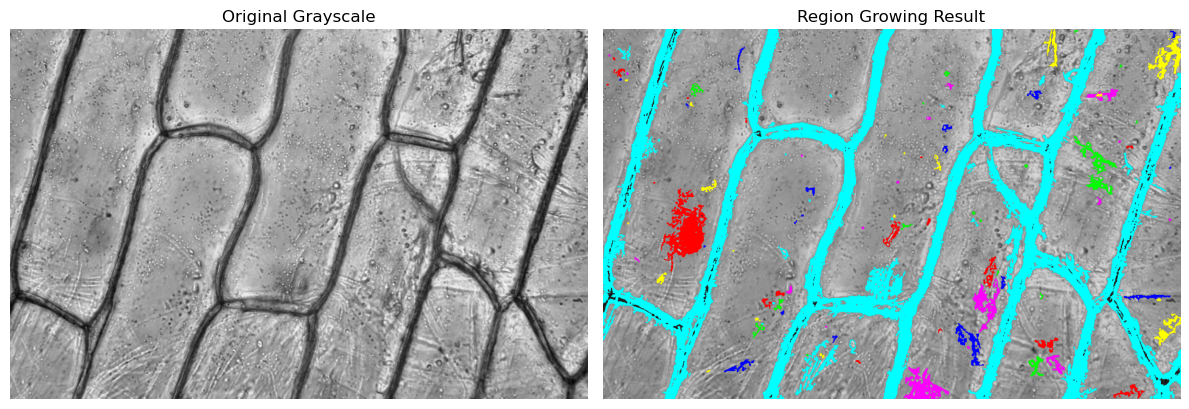

In [102]:
# Show final result
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Original Grayscale')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Region Growing Result')
plt.imshow(color_output)
plt.axis('off')

plt.tight_layout()
plt.show()

In [103]:
len(np.unique(label_img))

109